In [55]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt

### Collect Follower Growth Data using Social Blade API

In [36]:
df1 = pd.read_csv(r"G:\ig\data_did.csv")
# len(df1.brand.unique().tolist())  202 brands
l = df1.brand.unique().tolist()
l.remove('nike')
l.remove('balmain')
# len(l) 202

In [44]:
import requests
for e in l:
    print(e, l.index(e))
    if os.path.exists(r"G:\ig\brands_stats_growth\{}.json".format(e)):
        print("Already existed")
    else:
        headers = {
            'query': e,
            'history': 'vault',
            'clientid': 'cli_ceb00bbd51f2d953728c6124',
            'token': '955bae71750ca7cc869bd9b0ac4f8a3df39edb1428940961746c9e3311fcf60e9e9455e7aa796f665ed88ab4b0a6912ee9a55ca773fc2b1c9677a52fc2df02e6',
        }

        response = requests.get('https://matrix.sbapis.com/b/instagram/statistics', headers=headers)
        with open(r"G:\ig\brands_stats_growth\{}.json".format(headers['query']), 'w') as f:
            json.dump(response.json(), f)

bvlgari 0


### Combine Follower Growth Data into One Dataframe

In [63]:
results = pd.DataFrame()
for i in os.listdir(r"G:\ig\brands_stats_growth"):
    #print(i)
    try:
        with open(r"G:\ig\brands_stats_growth\{}".format(i), 'r') as file:
            data = json.load(file)
        df = pd.DataFrame(data['data']['daily'])
        df['brand'] = i.split('.json')[0]
        results = pd.concat([results, df])
    except:
        print(i, "Failed")

emporioarmani.json Failed
louboutinworld.json Failed


In [68]:
results.to_csv(r"G:\ig\brands_stats_growth.csv")

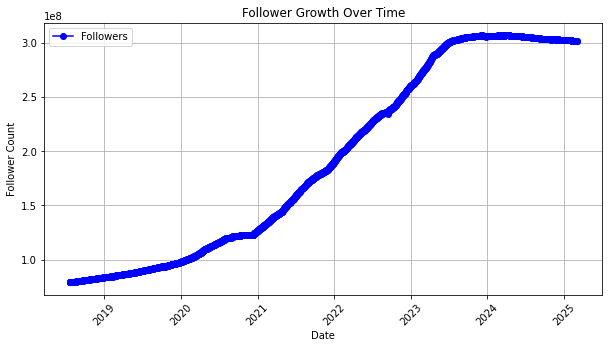

In [56]:

df = pd.DataFrame(data['data']['daily'])
df["date"] = pd.to_datetime(df["date"])

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["followers"], marker="o", linestyle="-", color="b", label="Followers")

# Formatting
plt.xlabel("Date")
plt.ylabel("Follower Count")
plt.title("Follower Growth Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Post Data Aggregate

In [101]:
df = pd.read_csv(r"G:\ig\total_posts_summary.csv")
df1 = pd.read_csv(r"G:\ig\data_did.csv")
df1 = df1[['id','authors','solo_author']]
df = df.drop(['affiliates', 'sponsored', 'ads'], axis=1)
df = df.merge(df1, on = 'id', how = 'left')
df[['authors', 'solo_author']] = df[['authors', 'solo_author']].fillna(0)
df['collab_posts'] = np.where(df['authors'] == 0, 0, 1)
df = df.drop(['solo_author'], axis=1)

In [103]:
df.to_csv(r"G:\ig\total_posts_summary_total.csv")

### Features Aggregation

In [104]:
f1 = pd.read_csv(r"G:\ig\features\clip_stats.csv")

In [105]:
f1

,image,clip
0,/mnt/e/erya/collab_posts_ig/image/abercrombie/...,0.239380
1,/mnt/e/erya/collab_posts_ig/image/abercrombie/...,0.232300
2,/mnt/e/erya/collab_posts_ig/image/abercrombie/...,0.249390
3,/mnt/e/erya/collab_posts_ig/image/abercrombie/...,0.245605
4,/mnt/e/erya/collab_posts_ig/image/abercrombie/...,0.240112
...,...,...
449402,/mnt/e/erya/collab_posts_ig/image/zimmermann/c...,0.284180
449403,/mnt/e/erya/collab_posts_ig/image/zimmermann/c...,0.256104
449404,/mnt/e/erya/collab_posts_ig/image/zimmermann/c...,0.255859
449405,/mnt/e/erya/collab_posts_ig/image/zimmermann/c...,0.282715


<AxesSubplot:>

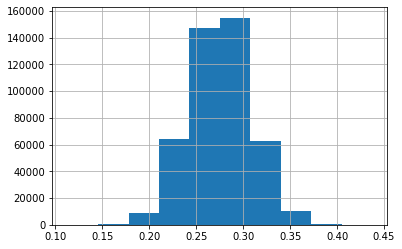

In [107]:
f1['clip'].hist()